# Meeting (and not meeting) the assumptions of linear regression


## Gauss Markov Conditions

* linearity of models in their coefficients
* the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

The following is not a condition but is important. Specifically, normality of errors is not required to apply OLS to a linear regression model, but in order to measure the statistical significance of our estimated coefficients, error terms must be normally distributed. (wont be covered here) 

## Assignments

To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below

### 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of [this dataset from Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.


Here are the credentials you can use to connect to the database:

```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
```

As in earlier assignments, be sure to close the database connection after initially pulling in your data.


### 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database. 
* Reimplement the model you built in the previous checkpoint. 
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
*  be sure to close the database connection after initially pulling in your data.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
temp_hist = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


temp_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [3]:
temp_hist = temp_hist.rename(columns=lambda x: x.strip())

In [4]:
FILL_LIST = ['temperature', 'humidity', 'windspeed', 'pressure', 'windbearing']

# EDA will be limited here for a few reasons

    * All variables of interest are float64
    * No missing data from variables of interest

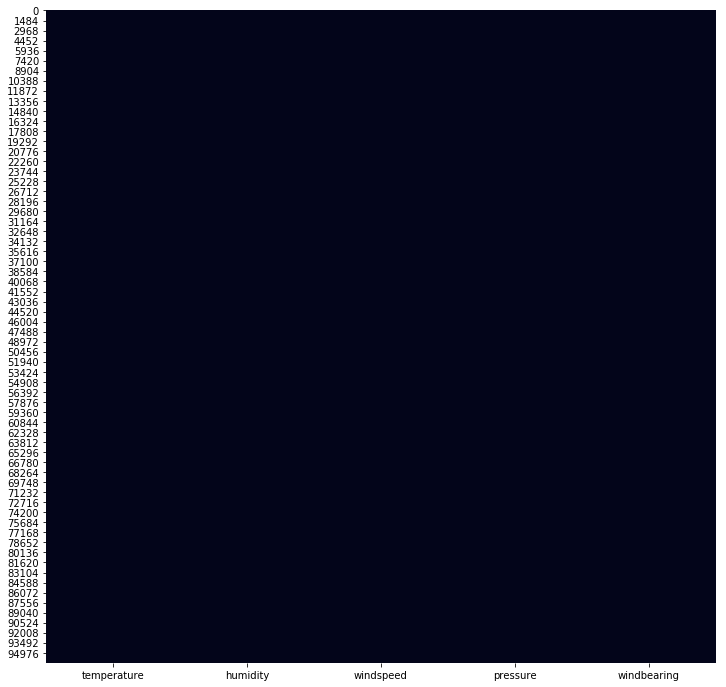

In [5]:
plt.figure(figsize=(12, 12))
sns.heatmap(temp_hist[FILL_LIST].isnull(), cbar=False)

### Following the instructions I will not make any changes to the feature or vectors

    * Visualizing whats going on now might explain what happens to our results later

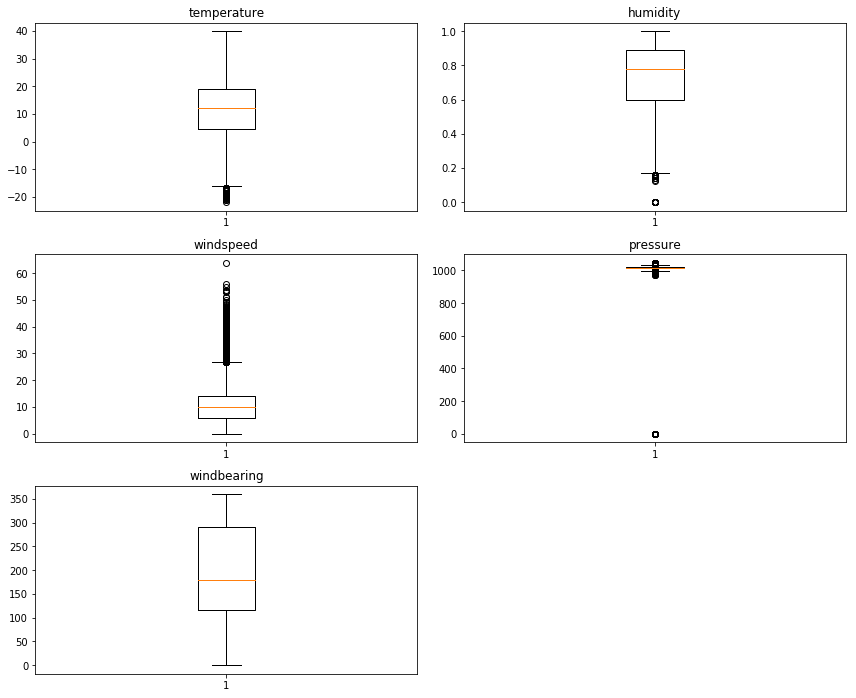

In [6]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    plt.subplot(len(FILL_LIST), 2, i+1)
    plt.boxplot(x=col, data=temp_hist[:], whis=1.5)
    plt.title(col)
    
plt.tight_layout()

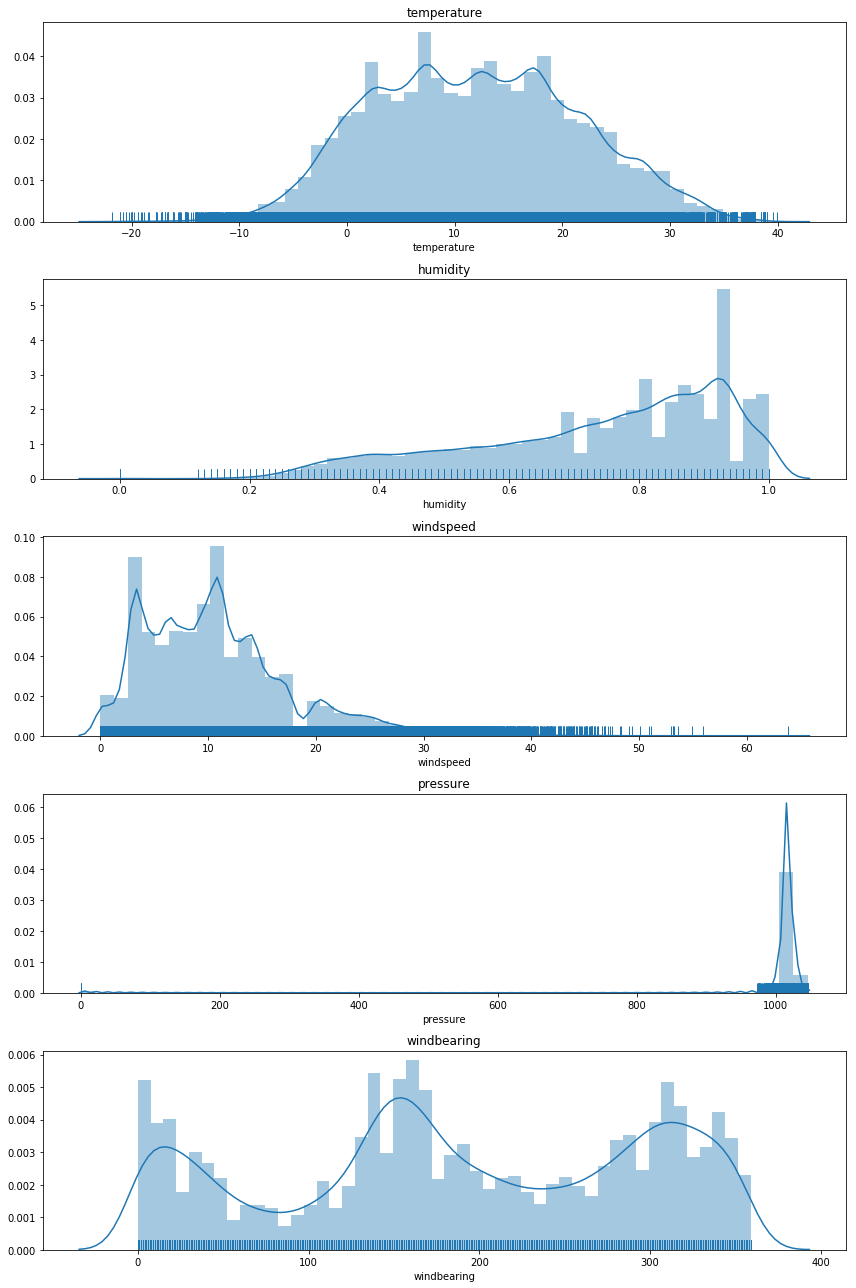

In [7]:
plt.figure(figsize=(12, 18))
plt.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(FILL_LIST):
    plt.subplot(len(FILL_LIST), 1, i+1)
    sns.distplot(temp_hist[col], rug=True)
    plt.title(col)
    
plt.tight_layout()

In [8]:
temp_hist[FILL_LIST].corr()

,temperature,humidity,windspeed,pressure,windbearing
temperature,1.000000,-0.632255,0.008957,-0.005447,0.029988
humidity,-0.632255,1.000000,-0.224951,0.005454,0.000735
windspeed,0.008957,-0.224951,1.000000,-0.049263,0.103822
pressure,-0.005447,0.005454,-0.049263,1.000000,-0.011651
windbearing,0.029988,0.000735,0.103822,-0.011651,1.000000


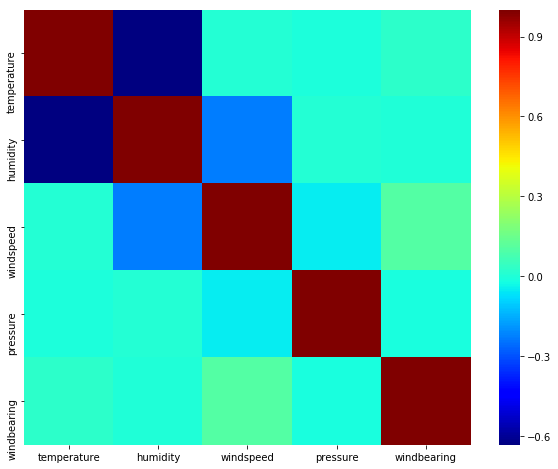

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(temp_hist[FILL_LIST].corr(), cmap='jet')

In [10]:
# We create a LinearRegression model object
lrm = lrm = linear_model.LinearRegression()

# We then select data and target 
data = temp_hist[FILL_LIST].iloc[:, 1:]
target = temp_hist['temperature']

# fit method estimates the coefficients using OLS
lrm.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
import statsmodels.api as sm

# Next we take a look at the results
# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(data)

results = sm.OLS(target, data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 5.950e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:16:54   Log-Likelihood:            -3.3991e+05
No. Observations:               96453   AIC:                         6.798e+05
Df Residuals:                   96449   BIC:                         6.799e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
humidity      -23.9965      0.126   -190.964      0.000     -24.243     -23.750
windspeed      -0.0460      0.004    -12.103      0.000      -0.053      -0.039
pressure        0.0278      0.000    252.540      0.000       0.028       0.028
windbearing     0.0096      0.000     39.178      0.000       0.009       0.010
==============================================================================
Omnibus:                     3331.234   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7796.776
Skew:                           0.191   Prob(JB):                         0.00
Kurtosis:                       4.339   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Gauss Markov Conditions: 

##### * linearity of models in their coefficients
* the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

The first assumption that must be met is that the target variable should be a linear function of the model's coefficients. __The relationship with Vectors can be non-linear, but its coefficient relationship must be Linear.__


Text(0, 0.5, 'target')

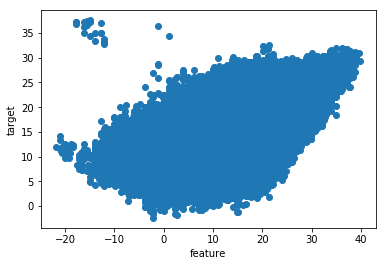

In [12]:
# we fit a linear regression where target is Y
# and features are in our list
lrm.fit(data, target)

# predictions of the linear regression
predictions = lrm.predict(data)

# Plot estimated results and target
plt.scatter(target, predictions)
plt.xlabel("feature")
plt.ylabel("target")

## Gauss Markov Conditions: 

* linearity of models in their coefficients - This seems linear
##### * the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

In [13]:
predictions = lrm.predict(data)
errors = target - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -3.9641821090813676e-15


### That is pretty close to zero, so the error we are seeing between features must be generated randomly and not by the variation in the target variable that is not explained by the features. 

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Looks Good 
* the error term should be zero on average - Looks Good
##### * homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

A model is homoscedastic when the distribution of its error terms (known as "scedasticity") is consistent for all predicted values. If our error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.

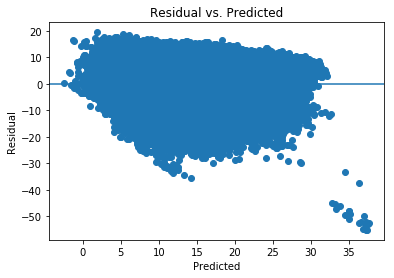

In [14]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [15]:
# We can also test for this under the following assumption
# The null hypothesis for both tests is that the errors are homoscedastic.

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


#### It appears that the p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

Some ways to deal with may include:
    * Outliers
    * Omitted Variables that are important in explaining variance
    * Transforming dependent variable (Box Cox & Log are common)
    * Adding features that target poorly estimated areas
    
However, keep in mind that even though your model suffers from the heteroscedasticity, the estimated coefficients are still valid. The only problem is with the reliability of some statistical tests like t-test. Heteroscedasticity may make some estimated coefficients seem to be statistically insignificant. (not covered here)

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Looks Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
##### * low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

In [16]:
temp_hist[FILL_LIST].corr()

,temperature,humidity,windspeed,pressure,windbearing
temperature,1.000000,-0.632255,0.008957,-0.005447,0.029988
humidity,-0.632255,1.000000,-0.224951,0.005454,0.000735
windspeed,0.008957,-0.224951,1.000000,-0.049263,0.103822
pressure,-0.005447,0.005454,-0.049263,1.000000,-0.011651
windbearing,0.029988,0.000735,0.103822,-0.011651,1.000000


## Gauss Markov Conditions: 

* linearity of models in their coefficients - Looks Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
* low multicollinearity - Looks Good 
    * Multicollinearity - can be fixed by PCA or by discarding some of the correlated features.
##### * error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

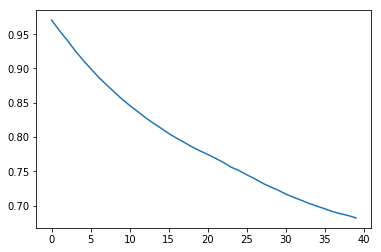

In [17]:
# using the autocorrelation function to see how our "error" variable is correlated with itself :single vector:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our model is indeed very high (ranging between 0.95 and 0.7). To fix this we may have to include some important variables into our model. 

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Looks Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
* low multicollinearity - Looks Good 
* error terms should be uncorrelated with one another - Not Good
##### * features shouldn't be correlated with the errors - Looks Good

    * Based on the below heatmap it looks like the features are plainly uncorrelated with error

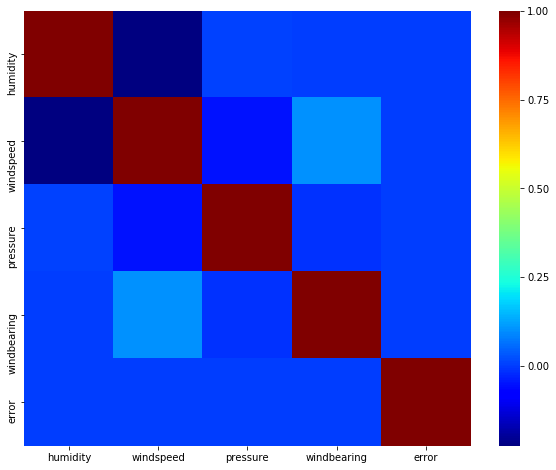

In [18]:
temp_err = data.copy()
temp_err['error'] = errors
plt.figure(figsize=(10, 8))
sns.heatmap(temp_err.corr(), cmap='jet')

### Bonus Error Normality 

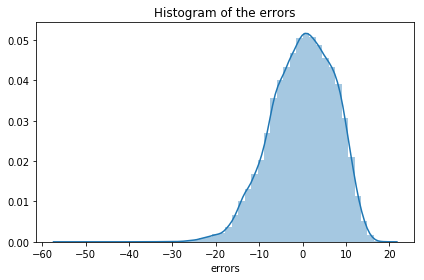

In [19]:
sns.distplot(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

Seems kind of close to normal, but with a heavy left skew and a couple other problems. Luckliy, we don't have to eyeball it we can test for it. 

In [20]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [21]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252356 and p value is 0.0
Normality test statistics is 3375.4323076995765 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.

### 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database. 
* Reimplement the model you built in the previous checkpoint. 
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
*  be sure to close the database connection after initially pulling in your data.

In [22]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
homes_df = pd.read_sql_query('select * from houseprices',con=engine)

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
homes_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


In [23]:
# Recreating the Model about house prices 

# ojects holding columns
non_numeric_columns = homes_df.select_dtypes(['object']).columns
numeric_columns = homes_df.select_dtypes(['int64', 'float64']).columns

# dropping columns Missing data
homes_df = homes_df.drop(['poolqc', 'miscfeature', 'alley', 
                          'fence', 'fireplacequ', 'lotfrontage'], axis=1)

# Dropping missing observations
homes_df = homes_df.dropna(axis=0)

numeric_columns = numeric_columns.drop(['id'])

FILL_LIST = []
for cols in homes_df[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)

In [24]:
from scipy.stats.mstats import winsorize

homes_win = homes_df.copy()

for col in FILL_LIST:
    homes_win[col] = winsorize(homes_win[col], (.05, .14))

In [25]:
from sklearn import preprocessing

def cat_converter(df):
    for cols in df:
        if cols in non_numeric_columns:
            
            # Create a label (category) encoder object
            le = preprocessing.LabelEncoder()
            
            # Create a label (category) encoder object
            le.fit(df[cols])
            
            # Apply the fitted encoder to the pandas column
            df[cols] = le.transform(df[cols]) 
    return df

cat_converter(homes_win)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,13518,1,0,3,0,2,0,...,0,0,0,0,0,10,2008,8,4,250000
5,6,50,3,13518,1,0,3,0,4,0,...,0,0,0,0,0,10,2009,8,4,143000
6,7,20,3,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,261500
7,8,60,3,10382,1,0,3,0,0,0,...,0,0,0,0,0,10,2009,8,4,200000
8,9,50,4,6120,1,3,3,0,4,0,...,0,0,0,0,0,4,2008,8,0,129900
9,10,90,3,7420,1,3,3,0,0,0,...,0,0,0,0,0,2,2008,8,4,118000


In [26]:
# selecting data and target
homes_mod1 = homes_win[['lotarea', 'bsmtfinsf1', 'secondflrsf', 'grlivarea', 'saleprice']]


### Modeling 

In [27]:
# We create a LinearRegression model object
lrm = linear_model.LinearRegression()

data = homes_mod1.iloc[:, :-1]
target = homes_mod1['saleprice']

# fit method estimates the coefficients using OLS
lrm.fit(data, target)

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(data)

results = sm.OLS(target, data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:17:02   Log-Likelihood:                -15754.
No. Observations:                1338   AIC:                         3.152e+04
Df Residuals:                    1334   BIC:                         3.154e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lotarea         0.9913      0.326      3.045      0.002       0.353       1.630
bsmtfinsf1     21.7550      2.475      8.790      0.000      16.900      26.610
secondflrsf   -33.2301      2.960    -11.227      0.000     -39.037     -27.424
grlivarea     114.4720      2.526     45.309      0.000     109.516     119.428
==============================================================================
Omnibus:                       73.877   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.916
Skew:                          -0.546   Prob(JB):                     2.98e-20
Kurtosis:                       3.650   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Gauss Markov Conditions: 

##### * linearity of models in their coefficients
* the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

Text(0, 0.5, 'target')

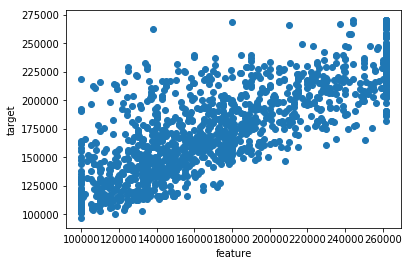

In [28]:
# we fit a linear regression where target is Y
# and features are in our list
lrm.fit(data, target)

# predictions of the linear regression
predictions = lrm.predict(data)

# Plot estimated results and target
plt.scatter(target, predictions)
plt.xlabel("feature")
plt.ylabel("target")

Looks like there may be a non-linear relationship here, the bottom left and top right clue me into that.

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Not Good
##### * the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

In [29]:
predictions = lrm.predict(data)
errors = target - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -1.9402553637822468e-11


## Gauss Markov Conditions: 

* linearity of models in their coefficients - Not Good 
* the error term should be zero on average - Looks Good
##### * homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

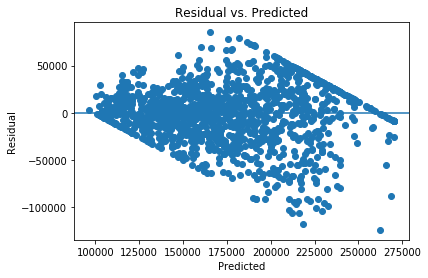

In [30]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Doesn't seem like our error terms are consistent, but lets test it. 

In [31]:
# We can also test for this under the following assumption
# The null hypothesis for both tests is that the errors are homoscedastic.
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 93.6778 and p value is 3.71e-22
Levene test statistic value is 172.233 and p value is 3.55e-38


#### It appears that the p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.    

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Not Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
##### * low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

In [32]:
MOD1_DF = homes_mod1.iloc[:, :-1]
MOD1_DF['target'] = homes_mod1['saleprice']
MOD1_DF.corr()

,lotarea,bsmtfinsf1,secondflrsf,grlivarea,target
lotarea,1.000000,0.159030,0.075739,0.417636,0.426524
bsmtfinsf1,0.159030,1.000000,-0.214104,0.040266,0.254677
secondflrsf,0.075739,-0.214104,1.000000,0.624211,0.252575
grlivarea,0.417636,0.040266,0.624211,1.000000,0.731764
target,0.426524,0.254677,0.252575,0.731764,1.000000


Looks like we do have some multicollinearity here being introduced by our feature selection. To adjust, we need to remove the one of the features highly correlated with another but less correlated with the target. 

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Not Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
* low multicollinearity - Not Good
##### * error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors

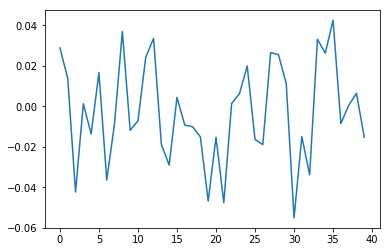

In [33]:
# using the autocorrelation function to see how our "error" variable is correlated with itself :single vector:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

This looks pretty good, the error terms do not seem to be correlated with each other. 

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Not Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
* low multicollinearity - Not Good
* error terms should be uncorrelated with one another - Looks Good
##### * features shouldn't be correlated with the errors - Looks Good

    * Based on the below heatmap it looks like the features are plainly uncorrelated with error


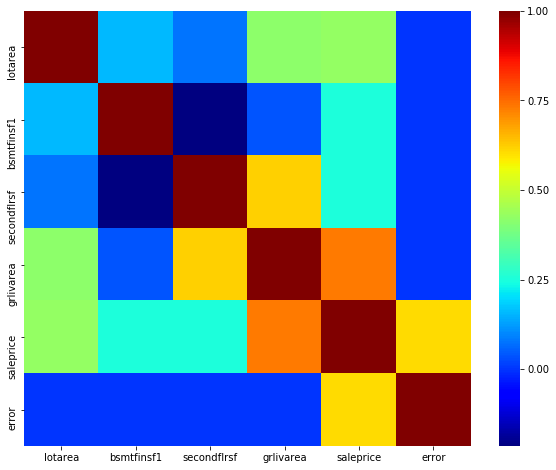

In [34]:
homes_err = homes_mod1.copy()
homes_err['error'] = errors
plt.figure(figsize=(10, 8))
sns.heatmap(homes_err.corr(), cmap='jet')

### Bonus Error Normality 

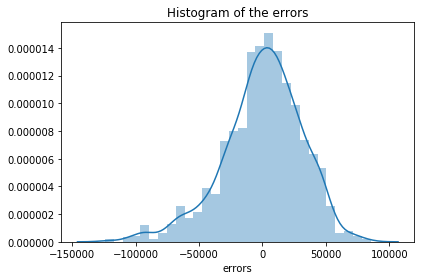

In [35]:
sns.distplot(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

This does seem like a normal distribution of error.

In [36]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 108.8148520904773 and p value is 0.0
Normality test statistics is 86.35050282235579 and p value is 1.7751152594293494e-19


Hmm, our error terms null hypothesis is rejected during the normal test, but not Jarque-Bera.

## Summary - First Model

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Looks Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
* low multicollinearity - Looks Good 
* error terms should be uncorrelated with one another - Not Good
* features shouldn't be correlated with the errors - Looks Good

## Summary - Second Model

## Gauss Markov Conditions: 

* linearity of models in their coefficients - Not Good 
* the error term should be zero on average - Looks Good
* homoscedasticity - Not Good 
* low multicollinearity - Not Good
* error terms should be uncorrelated with one another - Looks Good
* features shouldn't be correlated with the errors - Looks Good